In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%qtconsole

In [2]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import logging
logging.basicConfig(level=logging.INFO)

In [3]:
epoch_key = ('HPa', 6, 2)

In [4]:
from src.parameters import ANIMALS, SAMPLING_FREQUENCY

In [5]:
from loren_frank_data_processing.position import (
    get_interpolated_position_dataframe, get_position_dataframe, get_linear_position_structure)

interpolated_position_df = get_interpolated_position_dataframe(epoch_key, ANIMALS)
position_df = get_position_dataframe(epoch_key, ANIMALS)
linear_position_df = get_linear_position_structure(epoch_key, ANIMALS)

/Users/edeno/miniconda3/envs/Categorize_Replay_2017/lib/python3.6/site-packages/loren_frank_data_processing/position.py:193: RuntimeWarning: invalid value encountered in less
  at_target = distance_from_target < max_distance


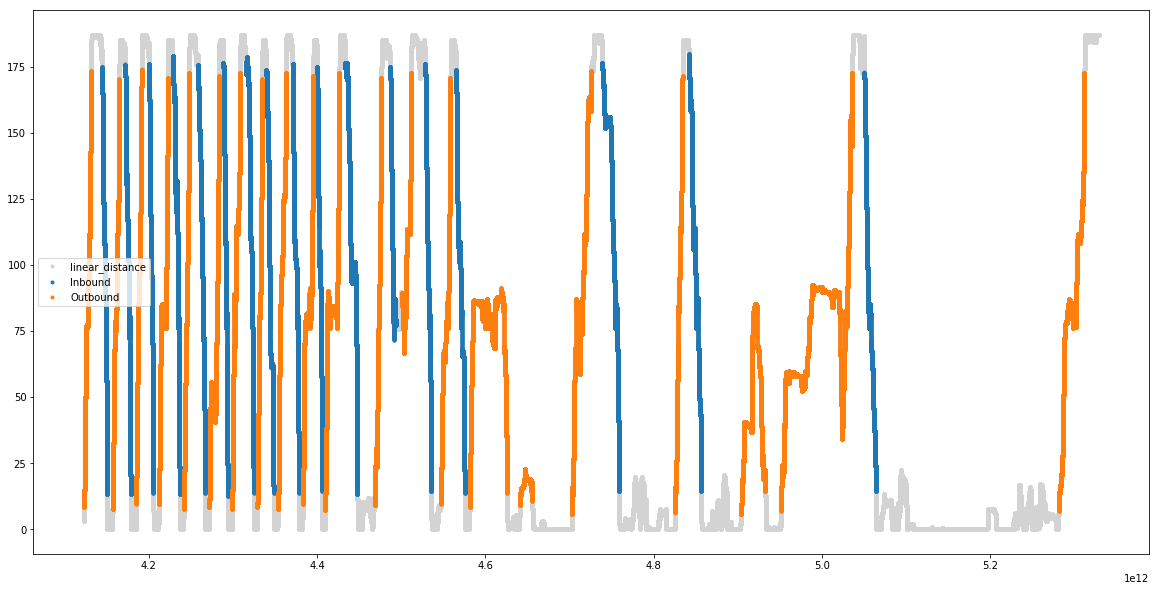

In [13]:
plt.figure(figsize=(20, 10))
plt.plot(interpolated_position_df.index, interpolated_position_df.linear_distance,
         color='lightgrey', linestyle='None', marker='.')
plt.plot(interpolated_position_df.loc[interpolated_position_df.task == 'Inbound'].index,
         interpolated_position_df.loc[interpolated_position_df.task == 'Inbound'].linear_distance,
         linestyle='None', marker='.', label='Inbound')
plt.plot(interpolated_position_df.loc[interpolated_position_df.task == 'Outbound'].index,
         interpolated_position_df.loc[interpolated_position_df.task == 'Outbound'].linear_distance,
         linestyle='None', marker='.', label='Outbound');
plt.legend();

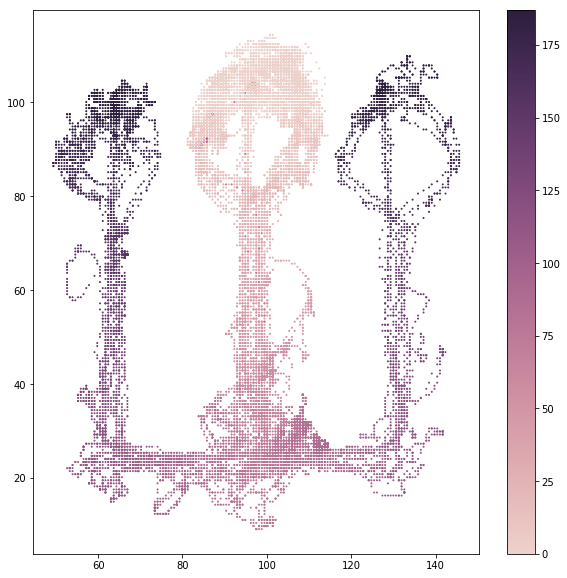

In [97]:
import seaborn as sns

cmap = sns.cubehelix_palette(as_cmap=True)

f, ax = plt.subplots(figsize=(10, 10))
points = ax.scatter(position_df.x_position, position_df.y_position,
                    c=linear_position_df.linear_distance, s=1, cmap=cmap)
f.colorbar(points)

In [17]:
from loren_frank_data_processing.core import get_data_structure

animal, day, epoch = epoch_key
task_file = get_data_structure(ANIMALS[animal], day, 'task', 'task')
linearcoord = task_file[epoch - 1]['linearcoord'][0, 0].squeeze()
linearcoord[0][:, :, 0].shape

(4, 2, 36120)

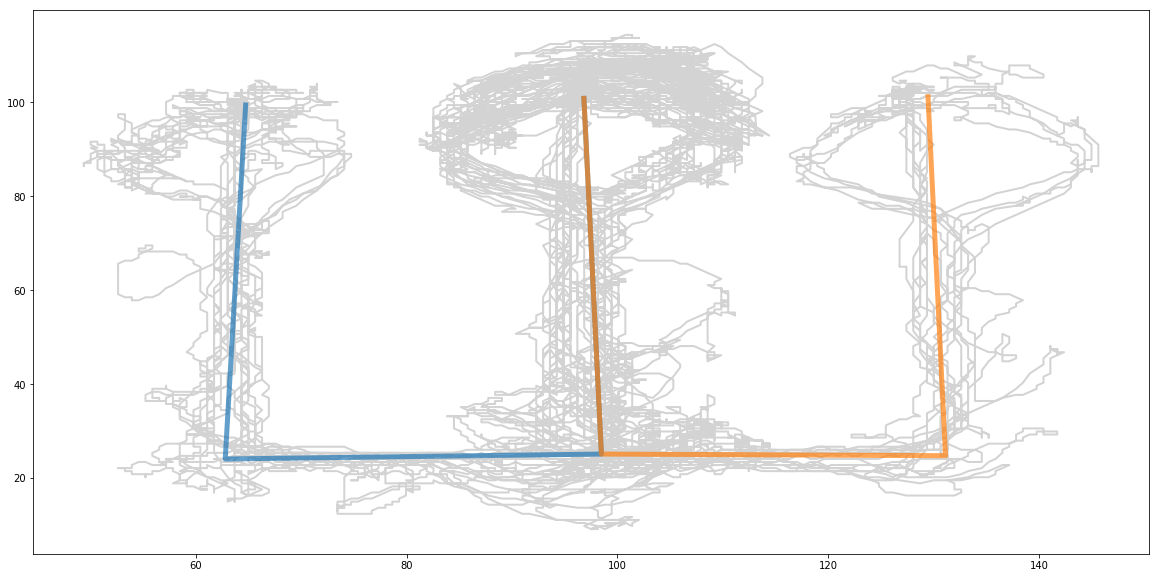

In [36]:
plt.figure(figsize=(20, 10))
plt.plot(position_df.x_position, position_df.y_position,
         color='lightgrey', linewidth=2)
for segment in linearcoord:
    plt.plot(segment[:, 0, 0], segment[:, 1, 0], linewidth=5, alpha=0.7)
    

In [107]:
from loren_frank_data_processing.position import segment_path
segments = np.concatenate([segment[:, :, 0] for segment in linearcoord])
_, unique_ind = np.unique(segments, axis=0, return_index=True)
segments = segments[np.sort(unique_ind)]
xy = np.stack((position_df.x_position, position_df.y_position), axis=1)
segments_df, labeled_segments = segment_path(
    position_df.index, xy, segments,
    max_distance_from_well=5)

/Users/edeno/miniconda3/envs/Categorize_Replay_2017/lib/python3.6/site-packages/loren_frank_data_processing/position.py:193: RuntimeWarning: invalid value encountered in less
  at_target = distance_from_target < max_distance


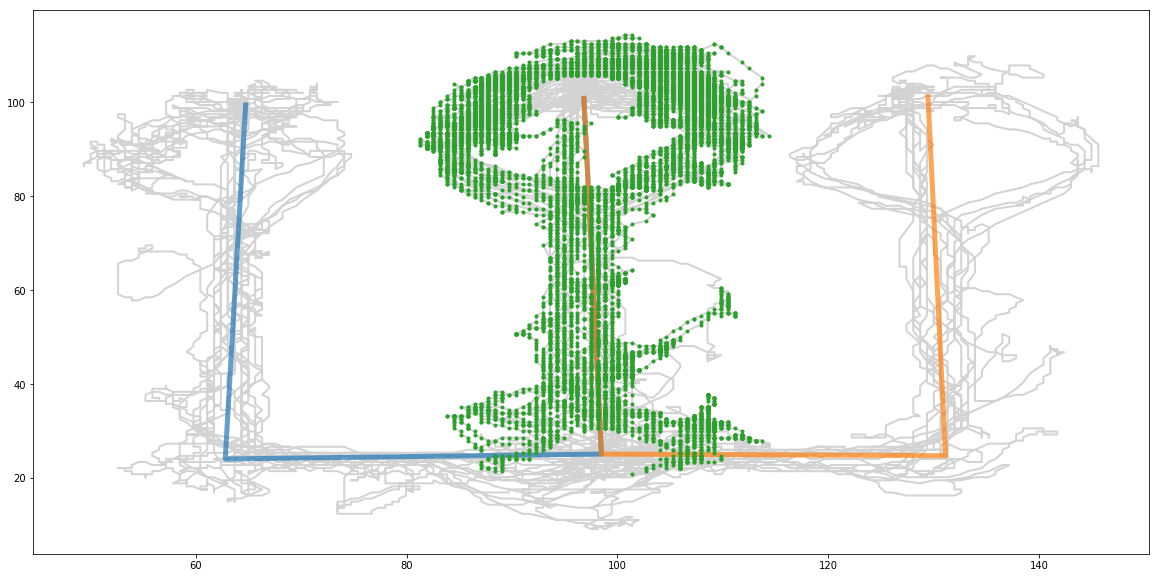

In [108]:
plt.figure(figsize=(20, 10))
plt.plot(position_df.x_position, position_df.y_position,
         color='lightgrey', linewidth=2)
for segment in linearcoord:
    plt.plot(segment[:, 0, 0], segment[:, 1, 0], linewidth=5, alpha=0.7)

s = segments_df.loc[((segments_df.from_well == 1) & (segments_df.to_well == 2)) |
                    ((segments_df.from_well == 2) & (segments_df.to_well == 1)) |
                    ((segments_df.from_well == 1) & (segments_df.to_well == 1))
                   ].index
is_seg = np.in1d(labeled_segments, s)
plt.plot(xy[is_seg, 0], xy[is_seg, 1], linewidth=5, linestyle='None', marker='.')

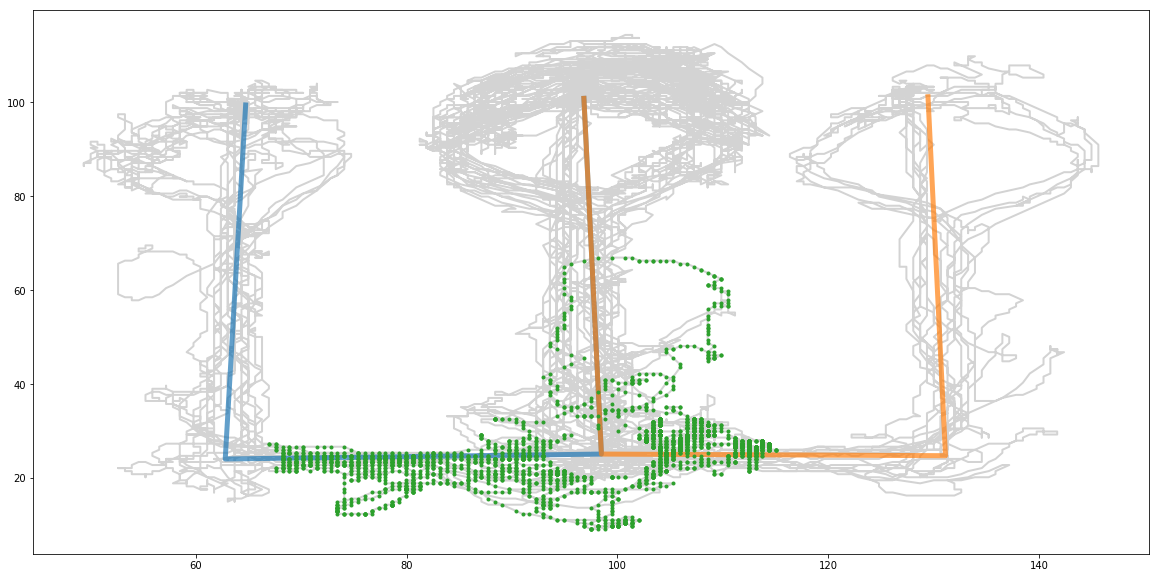

In [109]:
plt.figure(figsize=(20, 10))
plt.plot(position_df.x_position, position_df.y_position,
         color='lightgrey', linewidth=2)
for segment in linearcoord:
    plt.plot(segment[:, 0, 0], segment[:, 1, 0], linewidth=5, alpha=0.7)

s = segments_df.loc[((segments_df.from_well == 2) & (segments_df.to_well == 2)) |
                    ((segments_df.from_well == 2) & (segments_df.to_well == 3)) |
                    ((segments_df.from_well == 3) & (segments_df.to_well == 2))
                   ].index
is_seg = np.in1d(labeled_segments, s)
plt.plot(xy[is_seg, 0], xy[is_seg, 1], linewidth=5, linestyle='None', marker='.')

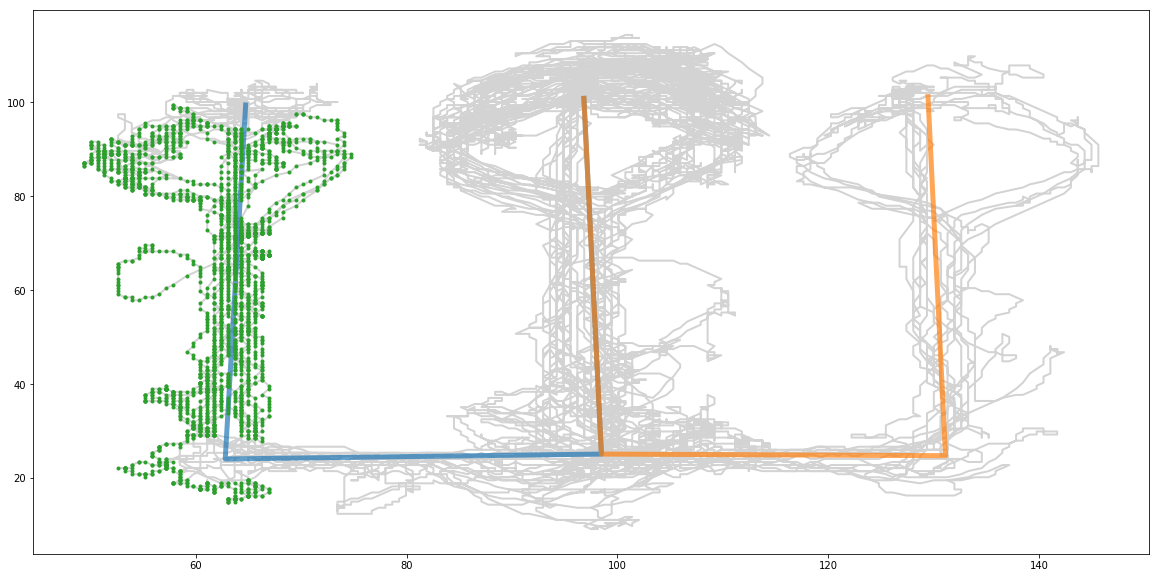

In [110]:
plt.figure(figsize=(20, 10))
plt.plot(position_df.x_position, position_df.y_position,
         color='lightgrey', linewidth=2)
for segment in linearcoord:
    plt.plot(segment[:, 0, 0], segment[:, 1, 0], linewidth=5, alpha=0.7)

s = segments_df.loc[((segments_df.from_well == 3) & (segments_df.to_well == 3)) |
                    ((segments_df.from_well == 3) & (segments_df.to_well == 4)) |
                    ((segments_df.from_well == 4) & (segments_df.to_well == 3))
                   ].index
is_seg = np.in1d(labeled_segments, s)
plt.plot(xy[is_seg, 0], xy[is_seg, 1], linewidth=5, linestyle='None', marker='.')

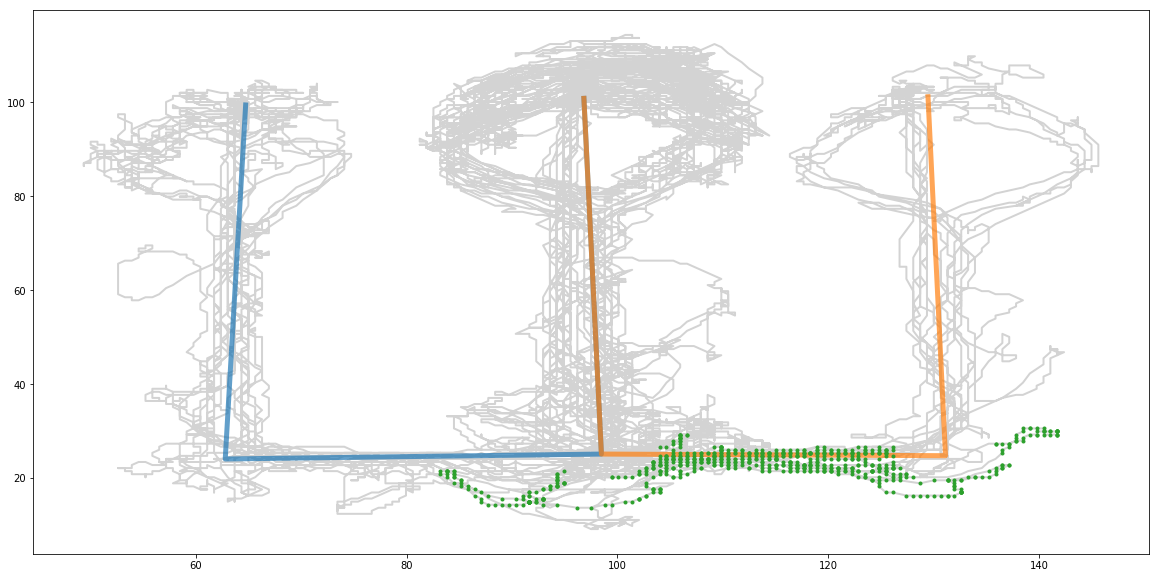

In [111]:
plt.figure(figsize=(20, 10))
plt.plot(position_df.x_position, position_df.y_position,
         color='lightgrey', linewidth=2)
for segment in linearcoord:
    plt.plot(segment[:, 0, 0], segment[:, 1, 0], linewidth=5, alpha=0.7)

s = segments_df.loc[((segments_df.from_well == 2) & (segments_df.to_well == 5)) |
                    ((segments_df.from_well == 5) & (segments_df.to_well == 2)) |
                    ((segments_df.from_well == 5) & (segments_df.to_well == 5))
                   ].index
is_seg = np.in1d(labeled_segments, s)
plt.plot(xy[is_seg, 0], xy[is_seg, 1], linewidth=5, linestyle='None', marker='.')

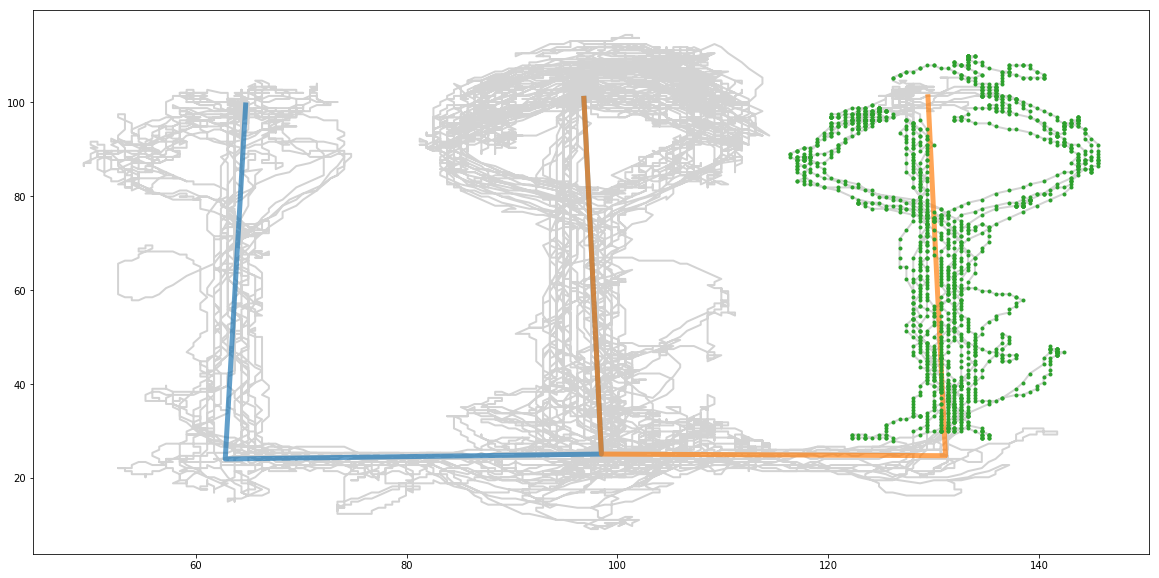

In [112]:
plt.figure(figsize=(20, 10))
plt.plot(position_df.x_position, position_df.y_position,
         color='lightgrey', linewidth=2)
for segment in linearcoord:
    plt.plot(segment[:, 0, 0], segment[:, 1, 0], linewidth=5, alpha=0.7)

s = segments_df.loc[((segments_df.from_well == 5) & (segments_df.to_well == 6)) |
                    ((segments_df.from_well == 6) & (segments_df.to_well == 5)) |
                    ((segments_df.from_well == 6) & (segments_df.to_well == 6))
                   ].index
is_seg = np.in1d(labeled_segments, s)
plt.plot(xy[is_seg, 0], xy[is_seg, 1], linewidth=5, linestyle='None', marker='.')

In [ ]:

function [q] = project_point_to_line_segment(A,B,p)
  % returns q the closest point to p on the line segment from A to B 

  % vector from A to B
  AB = (B-A);
  % squared distance from A to B
  AB_squared = dot(AB,AB);
  if(AB_squared == 0)
    % A and B are the same point
    q = A;
  else
    % vector from A to p
    Ap = (p-A);
    % from http://stackoverflow.com/questions/849211/
    % Consider the line extending the segment, parameterized as A + t (B - A)
    % We find projection of point p onto the line. 
    % It falls where t = [(p-A) . (B-A)] / |B-A|^2
    t = dot(Ap,AB)/AB_squared;
    if (t < 0.0) 
      % "Before" A on the line, just return A
      q = A;
    else if (t > 1.0) 
      % "After" B on the line, just return B
      q = B;
    else
      % projection lines "inbetween" A and B on the line
      q = A + t * AB;
    end
  end
end